## Customer Personality Analysis

a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.  
--> **군집분석**?

**People - 고객** 

ID: Customer's unique identifier - 아이디  
Year_Birth: Customer's birth year - 출생연도    
Education: Customer's education level - 교육수준  
Marital_Status: Customer's marital status - 결혼상태  
Income: Customer's yearly household income - 수입  
Kidhome: Number of children in customer's household - 미취학 자녀 수  
Teenhome: Number of teenagers in customer's household - 10대 자녀 수  
Dt_Customer: Date of customer's enrollment with the company - 고객 등록 날짜  
Recency: Number of days since customer's last purchase - 고객의 마지막 구매 이후 일 수  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise - 지난 2년 동안 고객의 컴플레인 여부(했으면 1, 아니면 0) 

**Products - 상품**   

MntWines: Amount spent on wine in last 2 years - 지난 2년간 와인 구입 비용  
MntFruits: Amount spent on fruits in last 2 years - 지난 2년간 과일 구입 비용  
MntMeatProducts: Amount spent on meat in last 2 years - 지난 2년간 육류 구입 비용   
MntFishProducts: Amount spent on fish in last 2 years - 지난 2년간 생선류 구입 비용    
MntSweetProducts: Amount spent on sweets in last 2 years - 지난 2년간 사탕 구입 비용  
MntGoldProds: Amount spent on gold in last 2 years - 지난 2년간 금 구입 비용  

**Promotion - 이벤트(할인)라고 생각하겠음**  
 
NumDealsPurchases: Number of purchases made with a discount - 할인된 구매 횟수(할인이 있을 시 구매한 횟수)  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise - 첫 번째 캠페인에서 구매한 경우 1, 아니면 0  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise - 두 번재 캠페인에서 구매한 경우 1, 아니면 0  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise - 세 번째 캠페인에서 구매한 경우 1, 아니면 0  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise - 네 번째 캠페인에서 구매한 경우 1, 아니면 0  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise - 다섯 번째 캠페인에서 구매한 경우 1, 아니면 0  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise - 마지막 캠페인에서 구매한 경우 1, 아니면 0  

**Place - 장소**

NumWebPurchases: Number of purchases made through the company’s website - 웹사이트를 통해 구매  
NumCatalogPurchases: Number of purchases made using a catalogue - 카탈로그(전단지)를 통해 구매  
NumStorePurchases: Number of purchases made directly in stores - 상점에서 직접 구매  
NumWebVisitsMonth: Number of visits to company’s website in the last month - 지난 달 웹사이트를 방문하여 구매  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
raw = pd.read_csv("./marketing_campaign.csv")

In [ ]:
## dataframe 정리

# 변수 추가 및 제거 / 결측치 제거 까지 완료한 df
drop_col
# 더미변수까지 만든 df
dum
# 표준화까지 마친 df
scaled_df

# 1. EDA

In [4]:
raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### 1. 범주형 변수 범주 확인

In [5]:
# Education

raw.Education.unique()
# basic, 2n(second) cycle : ??

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [6]:
# Marital Status

raw.Marital_Status.unique()
# widow : 과부 / absurd : ?? / yolo : ??

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### 2. 결측, 변수 제거

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
## 결측제거

# 결측 제거하는 게 나을 듯?? 어차피 데이터 수도 많고, 
# 고객 특성 중 income은 중요한 특성 같아서 그걸 그냥 평균낸 값으로 대체하면 조금 Miss일 거 같은 느낌 !
# 실제로 밑에 상관계수표 보면 상관성이 높은 아이들은 대부분 People 관련 변수 - Products, Promotion 관련 변수 보다는
# Products - Promotion 관련 변수끼리의 상관성이 높은데 그나마 Income이 People관련 변수 중에 구매 성향 상관성???이 많은 편!!

In [7]:
drop_na = raw.dropna(axis=0)

In [8]:
## Z_ 변수 제거

drop_col = drop_na.drop(columns = ['Z_CostContact','Z_Revenue'])

### 변수 추가

In [9]:
## 나이 변수 추가

drop_col['age'] = 2021 - drop_col['Year_Birth'] 

## 총 자녀 수
drop_col["Children"] = drop_col["Kidhome"] + drop_col["Teenhome"]

## 총 지불액
drop_col['TotalMntSpent'] = drop_col['MntWines'] + drop_col['MntFruits'] + drop_col['MntMeatProducts'] + drop_col['MntFishProducts'] + drop_col['MntSweetProducts'] + drop_col['MntGoldProds']

## 날짜 format
drop_col['Dt_Customer'] = pd.to_datetime(drop_col['Dt_Customer'],format = '%d-%m-%Y')

In [80]:
drop_col

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Children,TotalMntSpent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54,1,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75,3,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,65,1,843


In [12]:
drop_col[drop_col.age > 120]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Children,TotalMntSpent
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,121,1,65
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,128,1,22
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,122,0,1853


### 3. 변수 상관성/특성 파악

In [ ]:
# 상관계수

In [81]:
drop_col.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Children,TotalMntSpent
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,-0.021491,-0.002355,-0.000957,-0.017052
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,0.023692,-1.000000,-0.087398,-0.113487
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047,0.161791,-0.293352,0.667576
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,-0.077909,-0.233615,0.687794,-0.557899
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,-0.153901,0.350791,0.697907,-0.138153
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,-0.199766,0.016295,0.018290,0.020066
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,0.246299,0.159451,-0.353748,0.893136
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,0.122443,0.017747,-0.395901,0.613249
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,0.237746,0.033697,-0.504545,0.845884
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,0.108145,0.040425,-0.427841,0.642371


<AxesSubplot:>

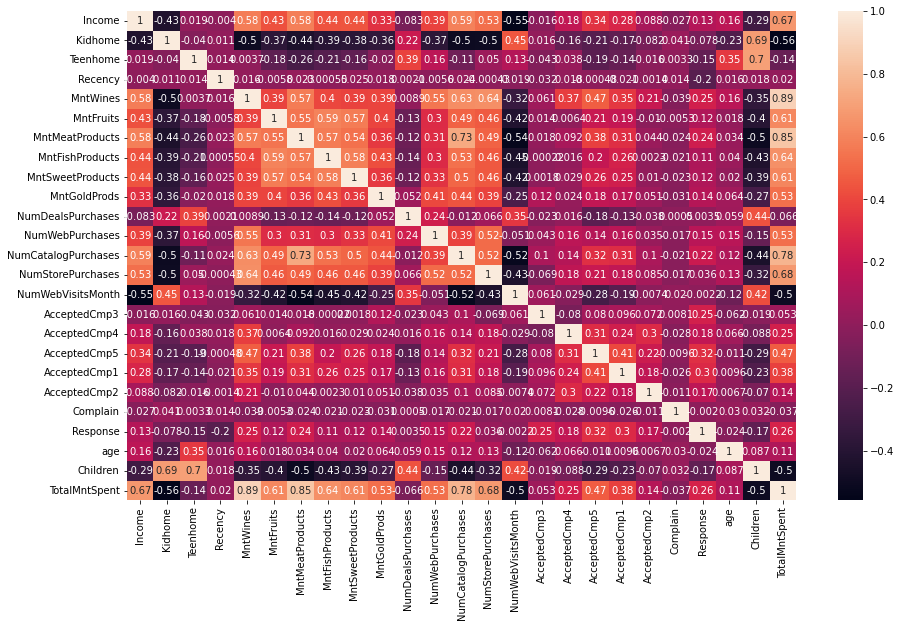

In [83]:
plt.figure(figsize=(15,9))
sns.heatmap(drop_col.drop(columns = ['ID','Year_Birth','Dt_Customer']).corr(), annot=True)

<AxesSubplot:>

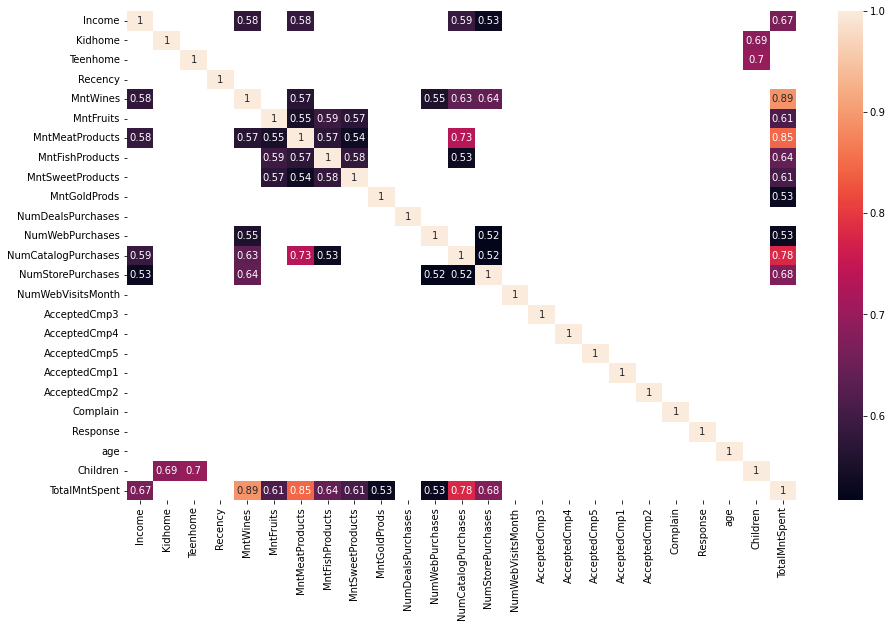

In [84]:
# 높은 양의 상관관계 ( > 0.5)
plt.figure(figsize=(15,9))
sns.heatmap(drop_col.drop(columns = ['ID','Year_Birth','Dt_Customer']).corr()[drop_col.corr()>0.5], annot=True)

<AxesSubplot:>

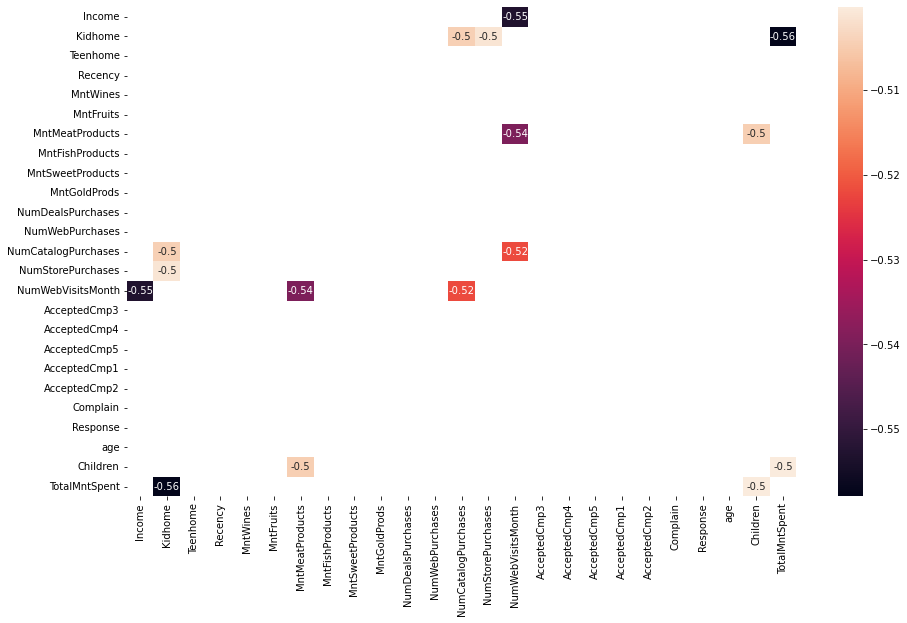

In [85]:
# 높은 음의 상관관계 ( < -0.5 )
plt.figure(figsize=(15,9))
sns.heatmap(drop_col.drop(columns = ['ID','Year_Birth','Dt_Customer']).corr()[drop_col.corr()<-0.5], annot=True)

In [ ]:
## 결론 : Promotion 중에 고기를 산다든가, 과일을 살 때 고기, 생선, 단 것들을 산다든지 등의 모든 고객들의 보편적 구매특성이 높은 상관계수를 차지 함.
##       고객 특성 관련해서는 Income이 가장 다른 상품,프로모션 관련 변수들과 높은 상관계수를 많이 가짐 (중요한 변수인 것 같음)
##       또, Income이 높을수록 토탈 구매가 높아짐
##       and, kidhome인 집은 카탈로그, 스토어 구매가 음의 상관관계 ! 웹으로 주로 구매한다고 생각할 수 있음

### 3.5 스케일링 후 다시 상관분석
앞에는 단위가 워낙 달라서 상관계수의 신뢰성이 낮다고 생각해서 스케일링을 해야한다고 띵킹쓰 .... 근데 아닐수도...상관 없는걸수도...  
&& Standardization(표준화) 사용했는데 표준화가 맞을지 아님 다른 스케일러가 좋을지 확신 없음  
앗 근데 생각해보니 어차피 상관계수가 공분산을 표준화시킨거엿지... 응...  뻘짓핸내...  

#### 더미변수 생성

In [50]:
# 상관성에 관련 없는 변수 제거 
sc_col = drop_col.drop(columns = ['ID','Year_Birth','Dt_Customer'])

In [51]:
dum = pd.get_dummies(sc_col)

In [52]:
dum

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Children,TotalMntSpent,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,0,1617,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2,27,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,0,776,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,1,53,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,1,422,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,54,1,1341,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,75,3,444,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,40,0,1241,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,65,1,843,0,0,0,1,0,0,0,0,0,0,1,0,0


#### scailing

In [44]:
## standardization 사용

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [57]:
scaler = StandardScaler()
scaler.fit(dum)
scaled_df = pd.DataFrame(scaler.transform(dum))
scaled_df.columns = dum.columns
scaled_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Children,TotalMntSpent,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,-1.264803,1.675488,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,1.405806,-0.962358,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,-1.264803,0.280250,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.266777,0.070501,-0.919224,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,0.070501,-0.307044,-0.31497,-0.158041,-1.007246,-0.444062,1.899228,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.151917,0.070501,1.217598,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056
2212,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,-0.420530,1.904422,2.741110,-0.270546,-0.31497,-0.158041,-1.007246,-0.444062,1.899228,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
2213,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-1.016420,-1.264803,1.051696,-0.31497,-0.158041,0.992806,-0.444062,-0.526530,-0.030056,-0.036819,2.924333,-0.794110,-0.519533,-0.590553,-0.188452,-0.030056
2214,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.069896,0.070501,0.391404,-0.31497,-0.158041,-1.007246,2.251940,-0.526530,-0.030056,

#### 상관계수

<AxesSubplot:>

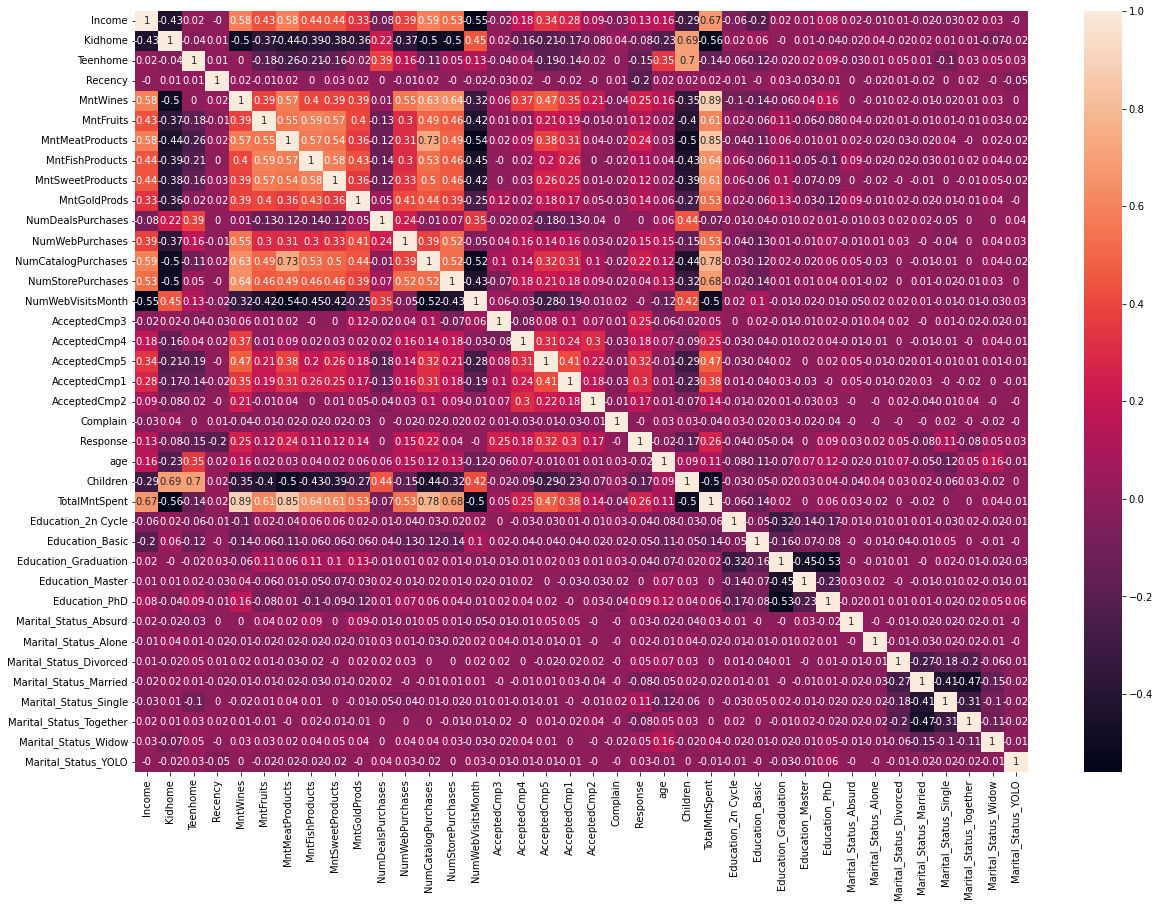

In [62]:
plt.figure(figsize=(20,14))
sns.heatmap(scaled_df.corr().round(2), annot=True)

<AxesSubplot:>

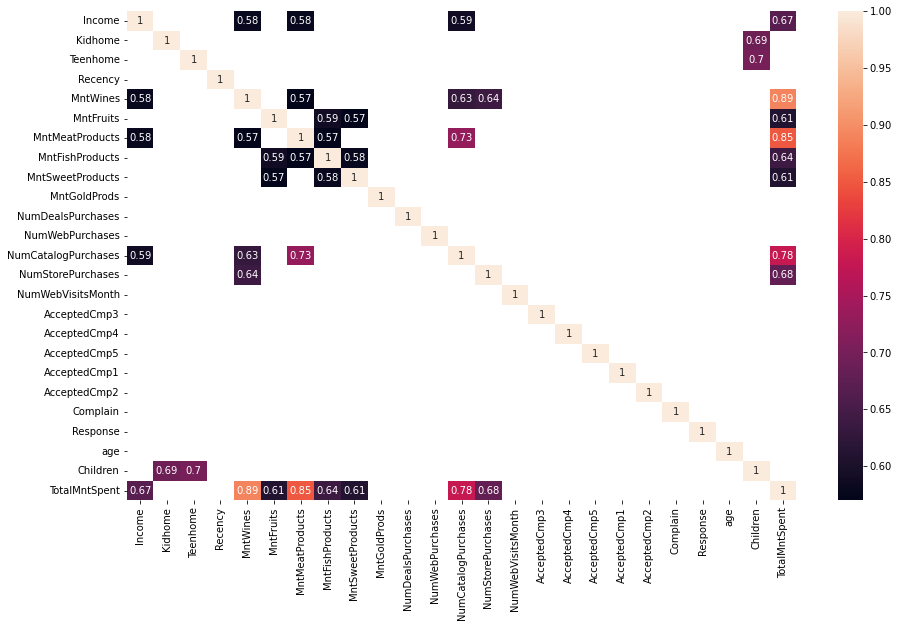

In [74]:
## 강한 양의 상관관계 - 0.55 

plt.figure(figsize=(15,9))
# 어차피 저 더미들은 상관계수 ㅂㄹ같아서 걍 삭제하고 ㄲ
zoomin = scaled_df.iloc[:,0:25].corr().round(2)
sns.heatmap(zoomin[zoomin>0.55], annot=True)

In [ ]:
## 결과 : 아까(스케일링 전)이랑 거의 똑같다 ! ^^ 당연함 그게 상관계수임

<AxesSubplot:>

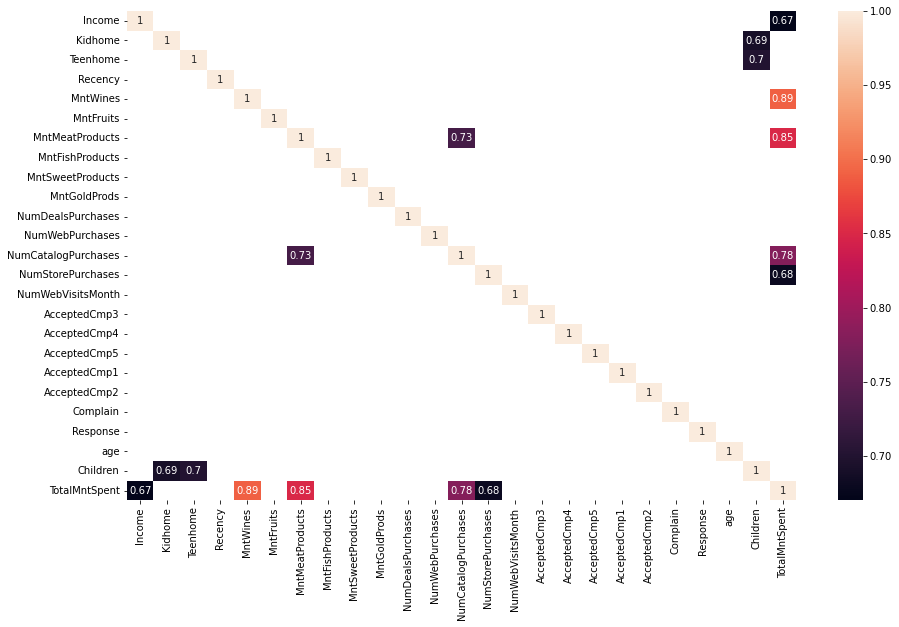

In [77]:
## ㄷㅓ 강한 양의 상관관계 - 0.65

plt.figure(figsize=(15,9))
# 어차피 저 더미들은 상관계수 ㅂㄹ같아서 걍 삭제하고 ㄲ
zoomin = scaled_df.iloc[:,0:25].corr().round(2)
sns.heatmap(zoomin[zoomin>0.65], annot=True)

In [ ]:
## 결과 : 지출 높을수록 총 구매액 증가인거 뺴고는 다 파생변수로 인해 중복된 상관계수임

### 4. 이상치 처리

#### 이상치 확인

/var/folders/z6/j3q11gsn0ls8wtjzqj36nssm0000gp/T/ipykernel_5420/2146044227.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


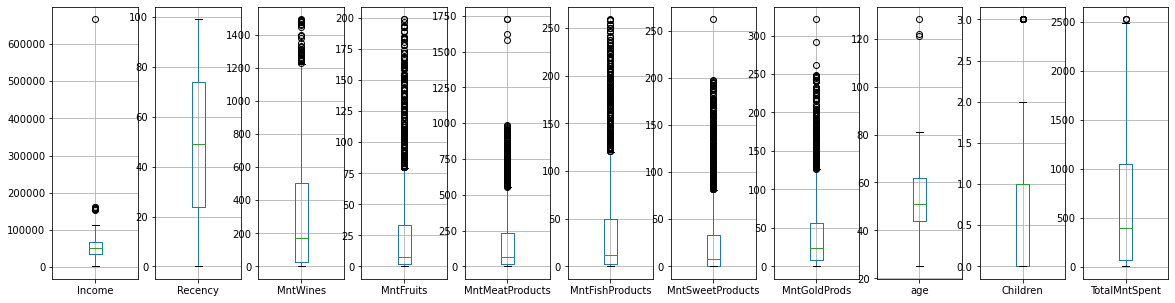

In [87]:
col = ['Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','age','Children','TotalMntSpent']
fig, axes = plt.subplots(nrows=1, ncols=11)
for (i,j) in zip(col, range(0,11)):
    drop_col.boxplot(column=i, ax = axes[j])
plt.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

In [20]:
drop_col[drop_col.MntSweetProducts > 250]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Children,TotalMntSpent
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,76,0,277


In [ ]:
# age 120 넘는게 말이 되나..? 저건 삭제하는ㄱㅔ 좋을듯...
# Income도 저 혼자 뛰는 애 오류인거 같음
# 나머지 Mnt는 어카지 걍 품고 가야될 듯? 

#### 이상치 개수

 이상치 및 사분위수 코드 참고
https://aliencoder.tistory.com/36